In [1]:
import sys
sys.path.insert(0, '../../scripts/')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import required packages
import pandas as pd
import numpy as np
# from PIL import Image

# preprocess
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# plots
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# local scripts
from text_utils import preprocess_corpus, untokenize_document

In [3]:
# read the dataset into a dataframe
df = pd.read_csv('../../data/data.csv')

# dataset shape: (rows, columns)
display(df.shape)

# first 5 datapoints
df.head()

(5842, 2)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


null counts
Sentence     0
Sentiment    0
dtype: int64


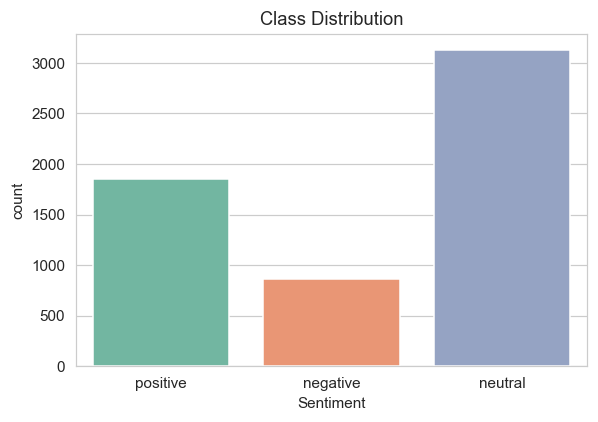

In [4]:
# class distribution
print(df['Sentiment'].value_counts())

# check null value counts
print('\n\nnull counts')
print(df.isnull().sum())

# plot the class distribution
plt.figure(dpi=110)
chart = sns.countplot(x="Sentiment", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Sentiment')
plt.show()

In [5]:
# count duplicate sentences
display(df[df['Sentence'].duplicated()].shape[0])

# extract indices of duplicate sentences
duplicate_indices = df[df['Sentence'].duplicated()].index.to_list()

dup_df = None

# extract each set of duplicate sentences
for index in duplicate_indices:
    dup_df = pd.concat([dup_df, df[df['Sentence'] == df['Sentence'].loc[index]]])

display(dup_df.head(6))

# drop the duplicate sentences with "neutral" sentiment
for index in duplicate_indices:
    temp = df[df['Sentence'] == df['Sentence'].loc[index]]
    dup_idx = temp[temp['Sentiment'] == 'neutral'].index[0]
    df = df.drop(index=dup_idx)

# reset the index
df = df.reset_index(drop=True)
    
# verify duplicate sentence counts after dropping
df[df['Sentence'].duplicated()].shape[0]

520

,Sentence,Sentiment
66,Finnish GeoSentric 's net sales decreased to E...,negative
266,Finnish GeoSentric 's net sales decreased to E...,neutral
163,Sales in Finland decreased by 10.5 % in Januar...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
195,Full-year operating result for 2008 was 3.6 mi...,neutral
349,Full-year operating result for 2008 was 3.6 mi...,negative


0

neutral     2610
positive    1852
negative     860
Name: Sentiment, dtype: int64


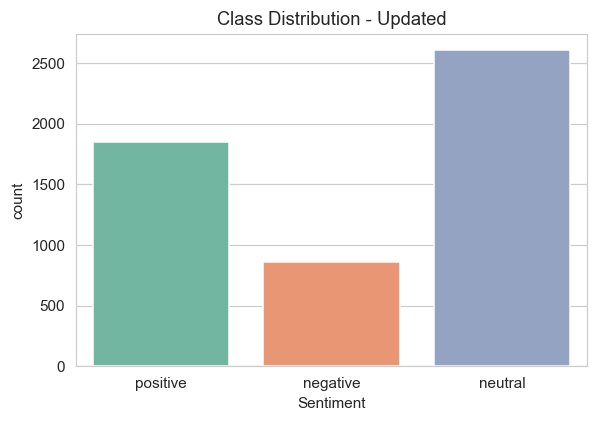

In [6]:
# class distribution after dropping duplicates
print(df['Sentiment'].value_counts())

# plot the class distribution after droping duplicates
plt.figure(dpi=110)
chart = sns.countplot(x="Sentiment", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution - Updated')
axes.set_xlabel('Sentiment')
plt.show()

In [7]:
# splitting into train-validation-test sets (60-20-20)
# performing a random split

# train-test split (80-20)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Sentiment'])

# train-validation split (80-20)
# 0.8 * 0.25 = 0.2
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=42, stratify=df_train['Sentiment'])

# rest index
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# size of train-validation-test sets
print('train:',df_train.shape[0])
print('valid:',df_valid.shape[0])
print('test:',df_test.shape[0])

# saving train set
df_train.to_csv('../../data/train_data.csv', index=False)

# saving validation set
df_valid.to_csv('../../data/valid_data.csv', index=False)

# saving test set
df_test.to_csv('../../data/test_data.csv', index=False)

train: 3192
valid: 1065
test: 1065


In [8]:
# preprocess the sentence column
df_train['clean_sentence'] = preprocess_corpus(df['Sentence'])

# first 5 cleaned datapoints
df_train.clean_sentence.head()

0    geosolutions technology leverage benefon gps s...
1                             esi low real possibility
2    last quarter componenta net sale doubled eur e...
3    according finnish russian chamber commerce maj...
4    swedish buyout firm sold remaining percent sta...
Name: clean_sentence, dtype: object

## WordCloud: Neutral sentences
----

In [9]:
# creating a mask for wordcloud
# mask = np.array(Image.open('../images/image.png'))
# plt.axis('off')
# plt.imshow(mask)
# plt.show()

# load stopwords for wordcloud
stop_words = stopwords.words('english')

# colormap for wordcloud
colormap = 'Set2'

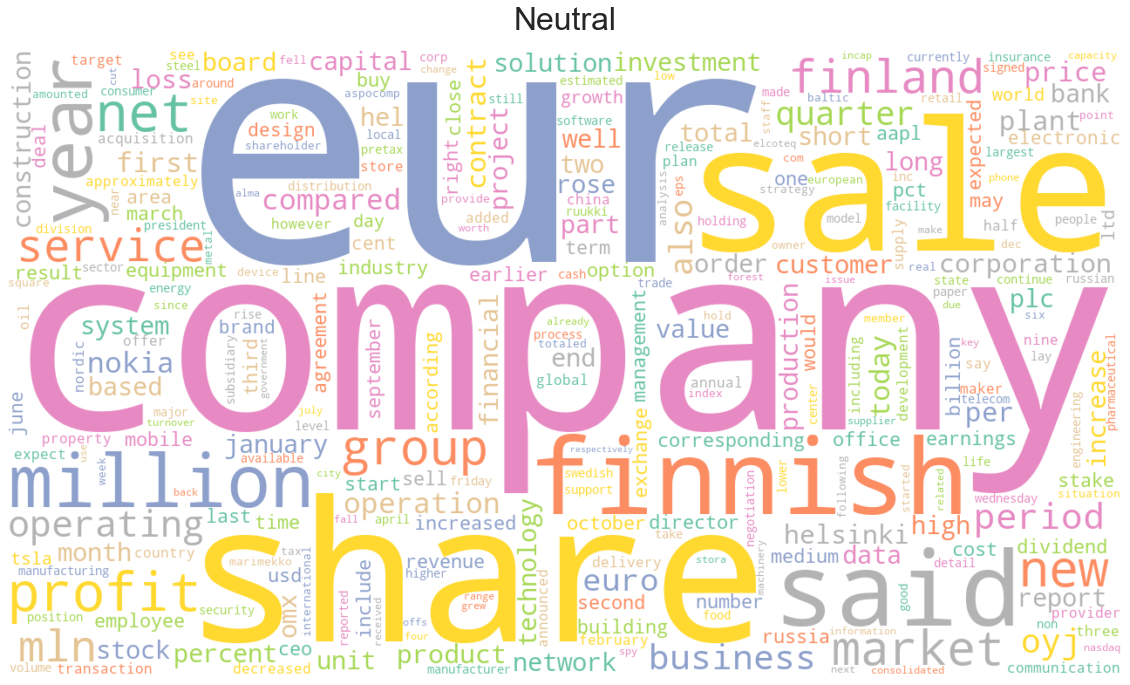

In [10]:
# wordcloud for neutral statements
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
#     mask=mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['Sentiment'] == 'neutral'].clean_sentence)))

plt.axis('off')
plt.title('Neutral', fontsize=32, pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig("../images/wordcloud-neutral.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Positive sentences
----

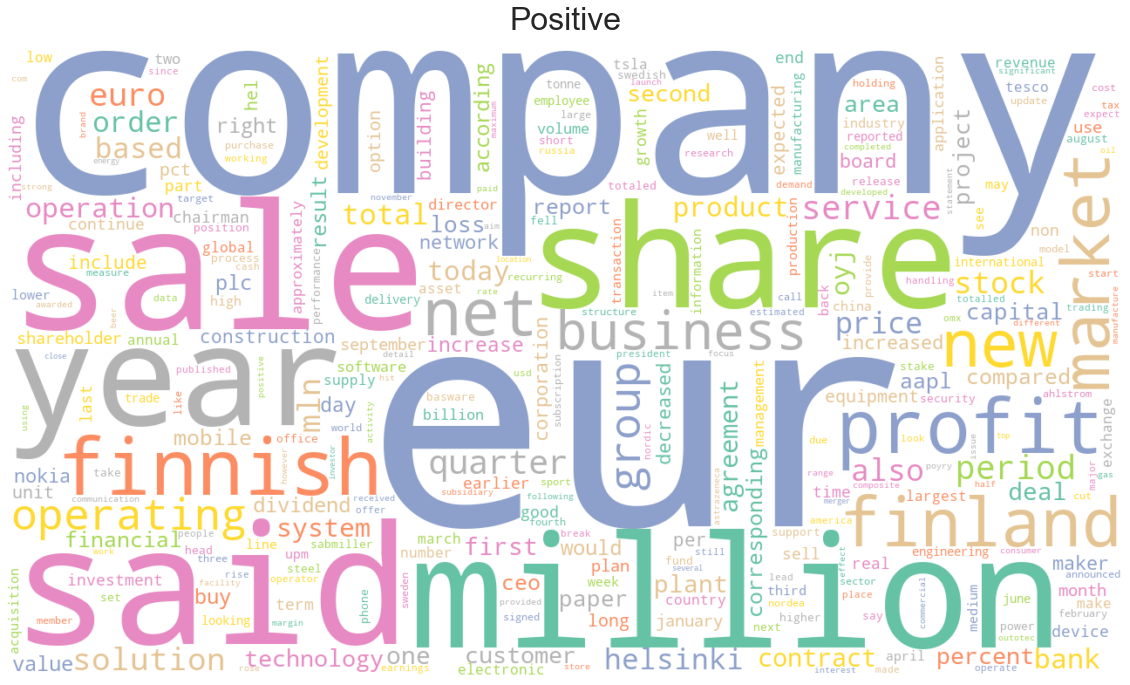

In [11]:
# wordcloud for positive statements
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
#     mask=mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['Sentiment'] == 'positive'].clean_sentence)))

plt.axis('off')
plt.title('Positive', fontsize=32, pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig("../images/wordcloud-positive.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Negative sentences
----

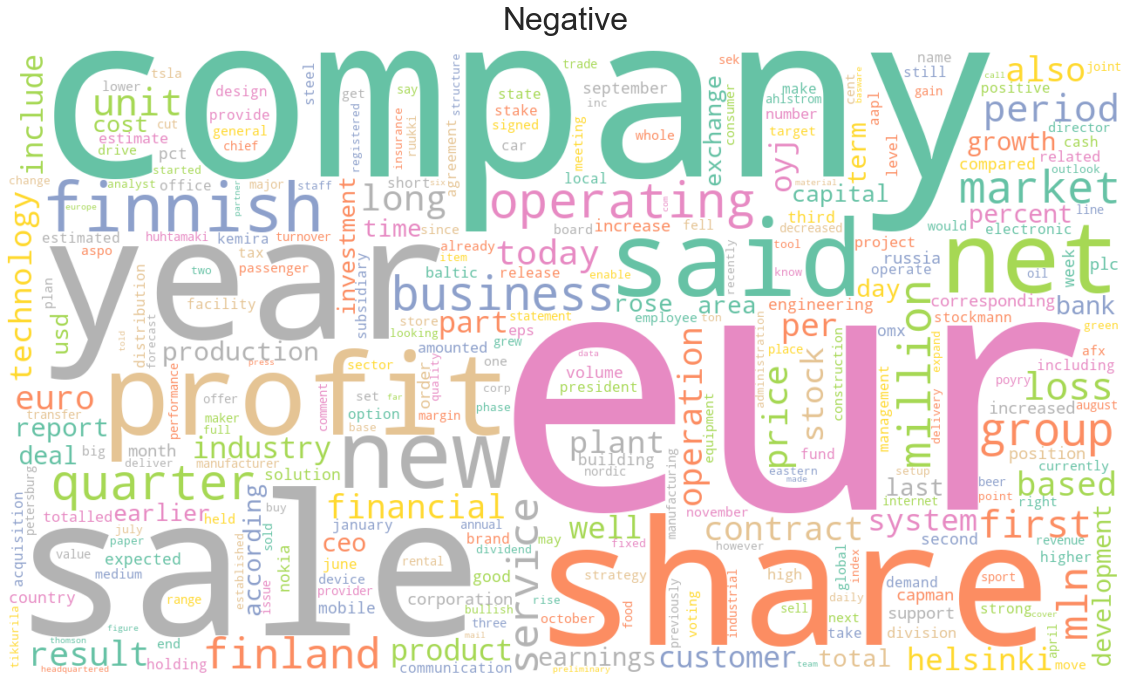

In [12]:
# wordcloud for negative statements
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
#     mask=mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['Sentiment'] == 'negative'].clean_sentence)))

plt.axis('off')
plt.title('Negative', fontsize=32, pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig("../images/wordcloud-negative.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()